<h1>目录与知识点<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据简介" data-toc-modified-id="数据简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据简介</a></span></li><li><span><a href="#样本不均衡解决方案" data-toc-modified-id="样本不均衡解决方案-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>样本不均衡解决方案</a></span></li><li><span><a href="#下采样策略" data-toc-modified-id="下采样策略-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>下采样策略</a></span></li><li><span><a href="#K折交叉验证" data-toc-modified-id="K折交叉验证-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K折交叉验证</a></span></li><li><span><a href="#模型评估方法" data-toc-modified-id="模型评估方法-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模型评估方法</a></span><ul class="toc-item"><li><span><a href="#逻辑回归-召回率与精度" data-toc-modified-id="逻辑回归-召回率与精度-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>逻辑回归-召回率与精度</a></span></li></ul></li><li><span><a href="#正则化惩罚项" data-toc-modified-id="正则化惩罚项-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>正则化惩罚项</a></span></li><li><span><a href="#逻辑回归阈值对结果影响" data-toc-modified-id="逻辑回归阈值对结果影响-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>逻辑回归阈值对结果影响</a></span></li><li><span><a href="#SMOTE样本生成策略" data-toc-modified-id="SMOTE样本生成策略-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>SMOTE样本生成策略</a></span></li></ul></div>

### 数据简介

本次交易异常数据集来源于网上，数据集为已脱敏并经过特征过程筛选下来的标准数据，即数据集中V1-V28是可以直接用的特征，我们不需要做其它的操作。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from pylab import * 
# 画图显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  

# 画图显示负号
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
origi_data = pd.read_csv('creditcard.csv')  

In [4]:
origi_data.head()  # 查看前5行内容

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**数据特征**

* **time**：交易时间
* **V1-V28**：脱敏后的标准数据
* **Amount**：交易金额
* **Class**：是否为异常交易，1 异常交易；0 正常交易

In [5]:
origi_data.info() # 查看缺失数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

可以看到，有约28万数据，无缺失值。

Sklearn 最多可以处理百万级别的数据，几个TB的数据就要用 handoop 等大数据平台进行处理。

0    284315
1       492
Name: Class, dtype: int64


Text(0.5,1,'不同交易类型数目对比')

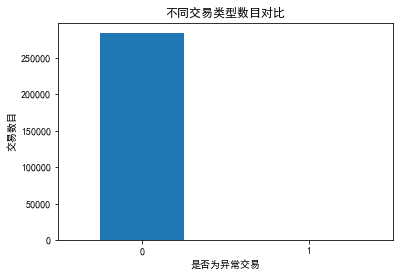

In [6]:
# 观察两类交易数据比例

print(origi_data['Class'].value_counts())
origi_data['Class'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0) 
plt.xlabel('是否为异常交易')
plt.ylabel('交易数目')
plt.title('不同交易类型数目对比')

按常识来说，肯定是正常交易多，异常交易极少，即**样本不均衡**，那我们建立模型时应如何训练数据？

### 样本不均衡解决方案

在面对样本不均衡情况时，最常用的有两种解决方案，一种叫做过采样策略，一种是下采样策略，本次案例中，我们来对比下两种策略。

我们先来看什么是下采样策略，在面对不均衡的样本时，下采样策略就是使样本都变少，也就是在多的样本里选出来跟少的一样多的样本，再将这些样本组合在一起。本次案例中，即为随机选取492个正常的样本，再加上492个异常样本作为训练数据。

过采样策略就是，根据一定的样本生成策略，使少的样本同多的样本一样多。本次案例中，即为对异常交易的样本生成二十多万个数据，使其交易数目和正常交易一样多，再作为模型训练数据

我们可以观察到V1-V28是经过标准化的数据，数据较小，Amount数据浮动差异较大，。在机器学习中，我们需要保证特征的分布差异是差不多的，不然模型可能会认为Amount就比其它特征重要，我们需要保证在模型建立时，不同特征在输入时其重要程度是相当的，因此我们需要对Amount列进行标准化。

In [7]:
# 对 Amount 列进行标准化

from sklearn.preprocessing import StandardScaler

data = origi_data.copy()
data['normAmount'] = StandardScaler().fit_transform(data[['Amount']]) # 输入 df 格式，非 Series 格式

# 舍弃不用的 Time 列和 Amount 列
data = data.drop(['Time', 'Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 下采样策略

下采样策略就是在面对不均衡的样本时，下采样策略就是使样本都变少，也就是在多的样本里选出来跟少的一样多的样本，再将这些样本组合在一起。本次案例中，即为随机选取492个正常的样本，再加上492个异常样本作为训练数据。

In [8]:
# 得到训练模型的 X 矩阵和 y 矩阵
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# 异常数据交易数目及索引
fraud_records_number = len(data[data['Class'] == 1])
fraud_records_index = data[data['Class'] == 1].index

# 正常交易数目及索引
normal_recorsd_number = len(data[data['Class'] == 0])
normal_records_index = data[data['Class'] == 0].index

# 从正常交易数目索引中随机选择异常数据交易数目个
random_normal_index = np.random.choice(normal_records_index, fraud_records_number, replace = False) # replace = False 表明是无放回取样

# 连接下采样策略得到的正常交易矩阵和异常交易矩阵
under_sample_index = np.concatenate([fraud_records_index, random_normal_index])
under_sample_records = data.loc[under_sample_index]

# 下采样策略样本的 X 和 y
X_undersample = under_sample_records.loc[:, under_sample_records.columns != 'Class']
y_undersample = under_sample_records.loc[:, under_sample_records.columns == 'Class']

# 让我们来看看训练集中正常交易的数目和异常交易的数目是否相同
normal_rate_in_undersample = sum(y_undersample['Class'] ==1)/len(y_undersample)
print('下采样策略后，总样本数为{}，正常交易数目占比 {:.2f}。'.format(len(y_undersample),normal_rate_in_undersample))

下采样策略后，总样本数为984，正常交易数目占比 0.50。


通过下采样策略，使得不均衡的样本均衡，代价是很多数据没有被利用到，是否会存在一些潜在的问题呢，继续看下去吧！

### K折交叉验证

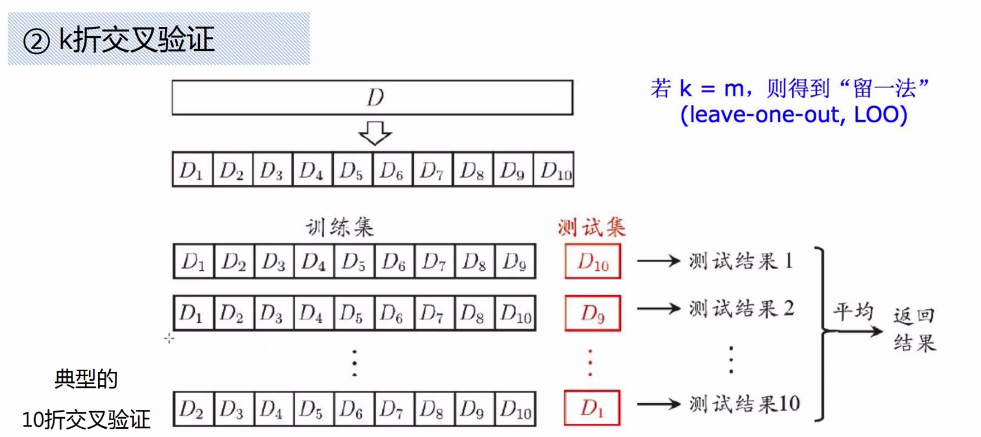

一般我们会将整个数据集分为训练集和测试集，训练集为我们要去训练模型的原始数据，测试集是我们最后用来测试模型的表达效果。但是我们希望能更挖掘训练集的作用，于是有了K折交叉验证。若k=10，也就是将训练集随机平均分成10份，第一次拿前9份去训练模型，第10份作为**验证**，得到测试结果1，第二次拿1-8及10去训练模型。第9份作为验证，以此类推，共得到10次测试结果。我们将这10次测试结果得到的准确值的平均值，作为模型在训练集上最后的输出值。

K折交叉验证并非一个重复操作，因为我们每次在训练集中抽取的小训练集和小测试集都不相同。我们不想浪费测试集来测试，于是在训练集中取一点数据来测试，进行k次是一个求稳的操作，因为某次抽取的小测试集可能异常数据影响较大而影响验证，于是k次后对准略率取平均。

这里我们先正常拆分数据集，迟点模型训练时我们来看看K折交叉验证怎么用！

In [9]:
from sklearn.cross_validation import train_test_split

# 对整个约28万数据集拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0) 
# 此处数据集切分会对数据集有个洗牌的操作，也就是随机打乱后，再拆分训练集和数据集，目的是排除原有的内在顺序的干扰
# test_size表示测试集占整个数据集0.2，random_state主要是为保证以后运行代码得到的训练集和测试集也相同

print('整个数据集中，测试集数目：{}'.format(len(X_train)))
print('整个数据集中，训练集数目：{}'.format(len(X_test)))

# 对下采样样本数据拆分训练集和测试集
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample,
                                                                                                    test_size = 0.2,
                                                                                                    random_state = 0)
print('\n下采样数据中，训练集数目：{}'.format(len(X_train_undersample)))
print('下采样数据中，测试集数目：{}'.format(len(X_test_undersample)))

整个数据集中，测试集数目：227845
整个数据集中，训练集数目：56962

下采样数据中，训练集数目：787
下采样数据中，测试集数目：197


E:\171222_Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


由于下采样数据中的test不具备原始数据分布规律，所以我们最后以整个数据集的test作为测试集。

### 模型评估方法

#### 逻辑回归-召回率与精度

本次我们以逻辑回归建立分类器，那我们如何评估我们的模型效果呢？

逻辑回归常用来评估模型效果的指标，**召回率**（**查全率**）和**精度**，召回率更加常用

**召回率** ： 所有的异常交易中，我们的分类器找到多少个

**精度**：所有的交易中，我预测对了多少个

下图是一个混淆矩阵图示，true condition 表示真实情况，predicted condition 表示预测情况

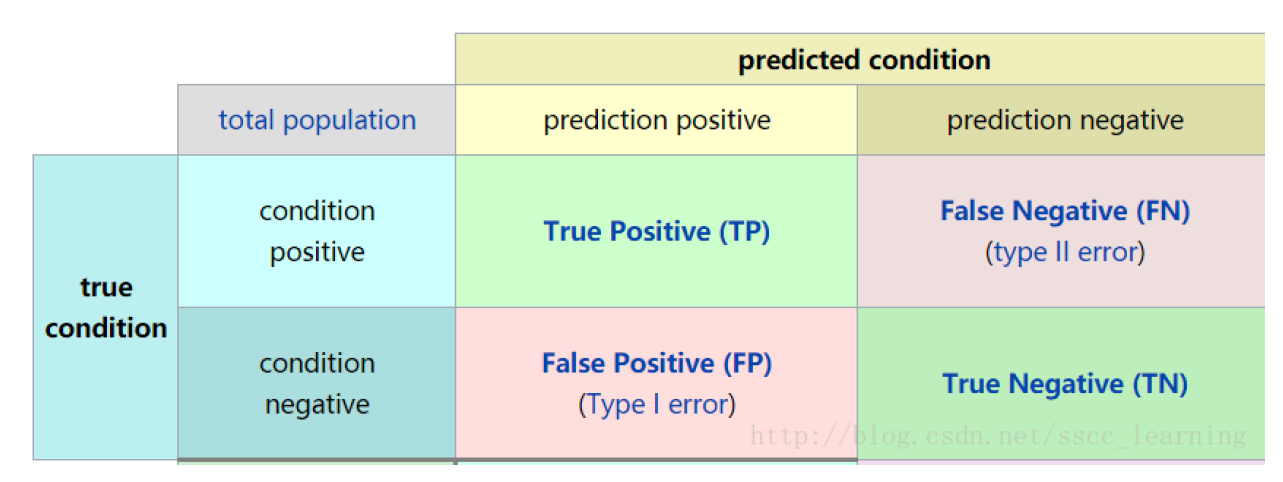

* True positive(TP)
 * 真实值为 Positive, 预测值为 Positive，预测正确 True
* True negative(TN)
 * 真实值为 Negative, 预测值为 Negative，预测正确 True
* False positive(FP)
 * 真实值为 Negative, 预测值为 Positive，预测错误 False， 第一类错误， Type Ⅰ error
* False negative(FN)
 * 真实值为 Positive, 预测值为 Negative，预测错误 False，第二类错误， Type Ⅱ error

召回率（查全率）： recall = TP/(TP+FN)

精度： accuracy = (TP + TF)/(TP + TN + FP + FN)

In [10]:
# 导入模型库

from sklearn.linear_model import LogisticRegression   # 逻辑回归模型
from sklearn.cross_validation import KFold, cross_val_score   # K折交叉验证   交叉验证得到的评估结果
from sklearn.metrics import confusion_matrix, recall_score, classification_report  # 混淆矩阵，召回率，

### 正则化惩罚项

假设我们有两个逻辑回归模型，A模型的参数为$\theta_1$到$\theta_{10}$,B模型的参数也为$\theta_1$到$\theta_{10}$，我们可以使用之前所说梯度下降的办法求解出参数的值，假设这两个模型最后的recall相同，A模型的$\theta$参数浮动较大，B模型的$\theta$参数浮动较小，此时我们会选用B模型。$\theta$参数浮动较大可能存在过拟合的现象，我们希望选择$\theta$浮动较小，更加稳定，泛化能力较强的模型。

为了添加对系数的惩罚项，我们在原来损失函数的基础上添加一项L2正则化，如下图所示

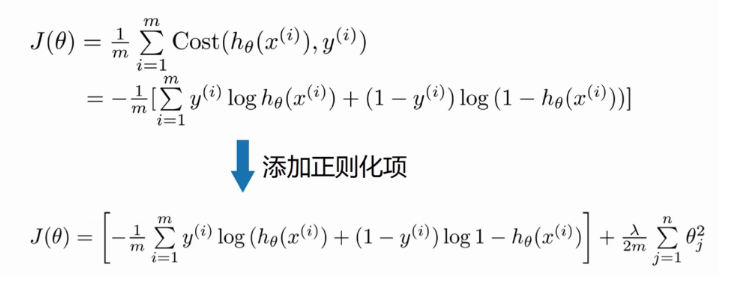

$\lambda$即为我们的惩罚力度,也就是正则化项占比。

In [11]:
def print_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5 , shuffle = False)

    # 正则化惩罚项系数 lambda，通过交叉验证来测试哪个 lambda会更好
    c_param_range = [0.01, 0.1, 1, 10, 100]  # 制定正则化惩罚项系数，也就是惩罚theta参数的范数（本次案例中选二范数）
    
    results_table = pd.DataFrame(columns = ['C_param', 'mean_recall'])
    results_table['C_param'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('c_param:{}'.format(c_param))
        
        # 建立召回率 list，存储当前 lambda 下，交叉验证得到的每一个召回率
        recall_lst = []
        
        # indices中产生 list1 和 list2, 分别代表 k 折交叉验证中的小训练集和小测试集
        for iteration, indices in enumerate(fold, start = 1):
        
            # 建立逻辑分类模型，设定lambda参数，设定惩罚系数
            lr = LogisticRegression(C = c_param)
        
            # 用模型去拟合
            lr.fit(x_train_data.iloc[indices[0]], y_train_data.iloc[indices[0]])
            
            # 用模型去预测
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1]])

            # 对每个交叉验证得到 recall 值
            recall = recall_score(y_train_data.iloc[indices[1]], y_pred_undersample)
            recall_lst.append(recall)
            print('Iteration {} recall {}'.format(iteration, recall))
               
        results_table['mean_recall'].iloc[j] = np.mean(recall_lst) 
        j += 1
        
        # 输出平均 recall 值
        print('\nMean Recall {}\n'.format(np.mean(recall_lst)))

    best_iloc = results_table[results_table['mean_recall'] == results_table['mean_recall'].max()].index
    best_c = results_table['C_param'][best_iloc]
    
    print('\n**************************')
    print('本次迭代从k折交叉验证中得到最好的参数选择是当惩罚系数为 {} 时'.format(best_c.values[0]))
    print('****************************')
    return best_c

In [12]:
best_c = print_Kfold_scores(X_train_undersample, y_train_undersample)

c_param:0.01
Iteration 1 recall 0.9213483146067416
Iteration 2 recall 0.8928571428571429
Iteration 3 recall 0.927536231884058
Iteration 4 recall 0.975609756097561
Iteration 5 recall 0.922077922077922

Mean Recall 0.9278858735046851

c_param:0.1
Iteration 1 recall 0.8651685393258427
Iteration 2 recall 0.8690476190476191
Iteration 3 recall 0.9130434782608695
Iteration 4 recall 0.9634146341463414
Iteration 5 recall 0.9090909090909091

Mean Recall 0.9039530359743164

c_param:1
Iteration 1 recall 0.8539325842696629
Iteration 2 recall 0.8690476190476191
Iteration 3 recall 0.927536231884058
Iteration 4 recall 0.9634146341463414
Iteration 5 recall 0.9090909090909091

Mean Recall 0.9046043956877181

c_param:10
Iteration 1 recall 0.8651685393258427
Iteration 2 recall 0.8690476190476191
Iteration 3 recall 0.9420289855072463
Iteration 4 recall 0.9634146341463414

E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\171222_Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



Iteration 5 recall 0.9090909090909091

Mean Recall 0.9097501374235917

c_param:100
Iteration 1 recall 0.8651685393258427
Iteration 2 recall 0.8690476190476191
Iteration 3 recall 0.9420289855072463
Iteration 4 recall 0.975609756097561
Iteration 5 recall 0.922077922077922

Mean Recall 0.9147865644112383


**************************
本次迭代从k折交叉验证中得到最好的参数选择是当惩罚系数为 0.01 时
****************************


### 逻辑回归阈值对结果影响

In [13]:
def plot_confusion_matrix(cm, classes = [0, 1],
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


下采样策略得到模型对197条数据集的小测试集得到的模型召回率为 0.945054945054945

下采样策略对197条数据的测试集得到的精度为0.934010152284264


E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


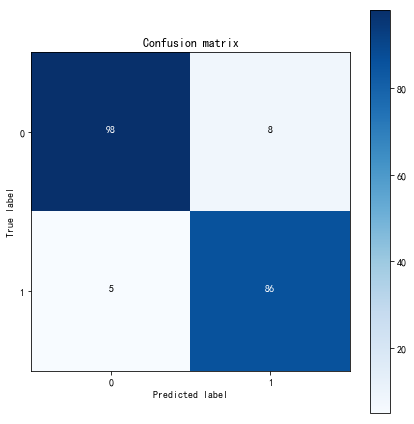

In [14]:
import itertools

# 利用 k 折交叉验证得到的正则化系数 建立模型 预测小批量测试集
lr = LogisticRegression(C = best_c.values[0], random_state = 0)
lr.fit(X_train_undersample, y_train_undersample)
y_undersample_pred = lr.predict(X_test_undersample)


# 建立混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample, y_undersample_pred)

# 画混淆矩阵图，希望以后可以调下字体
plt.figure(figsize = (6,6))
plot_confusion_matrix(cnf_matrix)

# 输出召回率
undersample_recall = cnf_matrix[1,1]/cnf_matrix[1,:].sum()
print('下采样策略得到模型对{}条数据集的小测试集得到的模型召回率为 {}\n'.format(len(y_test_undersample), undersample_recall))
# 输出精度
acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
print('下采样策略对{}条数据的测试集得到的精度为{}'.format(len(y_test_undersample), acc))


下采样策略得到模型对56962条数据集的小测试集得到的模型召回率为 0.9603960396039604

下采样策略得到模型对56962条数据的测试集得到的精度为0.9441381973947544


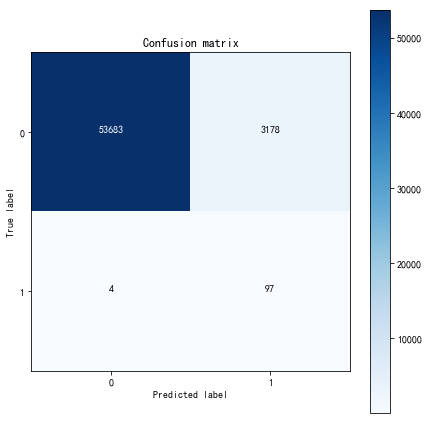

In [15]:
# 预测下大样本里的测试集看看效果如何

y_test_pred = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (6,6))
plot_confusion_matrix(cnf_matrix)

# 输出召回率
undersample_recall = cnf_matrix[1,1]/cnf_matrix[1,:].sum()
print('下采样策略得到模型对{}条数据集的小测试集得到的模型召回率为 {}\n'.format(len(y_test), undersample_recall))
# 输出精度
acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
print('下采样策略得到模型对{}条数据的测试集得到的精度为{}'.format(len(y_test), acc))


recall 值很高，我们很开心，但是我们发现，还是有很多交易判断错误，将正常交易判断成异常交易，如果最后用这样的模型，会增加工作人员的工作量，他们需要去判断由模型得到的异常交易是否真的为异常交易，我们再探索探索看看还有没有什么好办法。

In [16]:
# 我们先看看如果不用下采样策略，直接用原始数据集，效果如何呢？

best_c = print_Kfold_scores(X_train, y_train)

c_param:0.01


E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1 recall 0.56
Iteration 2 recall 0.575
Iteration 3 recall 0.6266666666666667
Iteration 4 recall 0.6753246753246753
Iteration 5 recall 0.47619047619047616

Mean Recall 0.5826363636363636

c_param:0.1


E:\171222_Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Iteration 1 recall 0.5466666666666666
Iteration 2 recall 0.6125
Iteration 3 recall 0.6133333333333333
Iteration 4 recall 0.6883116883116883
Iteration 5 recall 0.5

Mean Recall 0.5921623376623376

c_param:1
Iteration 1 recall 0.5333333333333333
Iteration 2 recall 0.625
Iteration 3 recall 0.6266666666666667
Iteration 4 recall 0.6753246753246753
Iteration 5 recall 0.5357142857142857

Mean Recall 0.5992077922077922

c_param:10
Iteration 1 recall 0.5466666666666666
Iteration 2 recall 0.625
Iteration 3 recall 0.6666666666666666
Iteration 4 recall 0.6753246753246753
Iteration 5 recall 0.5476190476190477

Mean Recall 0.6122554112554113

c_param:100
Iteration 1 recall 0.5466666666666666
Iteration 2 recall 0.625
Iteration 3 recall 0.6666666666666666
Iteration 4 recall 0.6753246753246753
Iteration 5 recall 0.5476190476190477

Mean Recall 0.6122554112554113


**************************
本次迭代从k折交叉验证中得到最好的参数选择是当惩罚系数为 10.0 时
****************************


E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


下采样策略得到模型对56962条数据集的小测试集得到的模型召回率为 0.6336633663366337

下采样策略得到模型对56962条数据的测试集得到的精度为0.9991924440855307


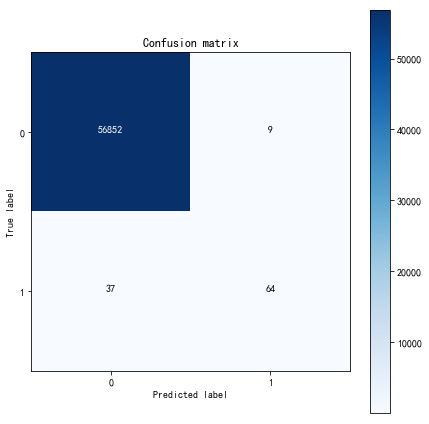

In [17]:
lr = LogisticRegression(C = best_c.values[0])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix)

# 输出召回率
undersample_recall = cnf_matrix[1,1]/cnf_matrix[1,:].sum()
print('下采样策略得到模型对{}条数据集的小测试集得到的模型召回率为 {}\n'.format(len(y_pred), undersample_recall))
# 输出精度
acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
print('下采样策略得到模型对{}条数据的测试集得到的精度为{}'.format(len(y_pred), acc))


E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


thresholds 0.1 召回率为 1.000 精度为 0.003
thresholds 0.2 召回率为 1.000 精度为 0.078
thresholds 0.3 召回率为 0.990 精度为 0.559
thresholds 0.4 召回率为 0.970 精度为 0.855
thresholds 0.5 召回率为 0.960 精度为 0.944
thresholds 0.6 召回率为 0.911 精度为 0.975
thresholds 0.7 召回率为 0.901 精度为 0.988
thresholds 0.8 召回率为 0.851 精度为 0.995
thresholds 0.9 召回率为 0.851 精度为 0.997


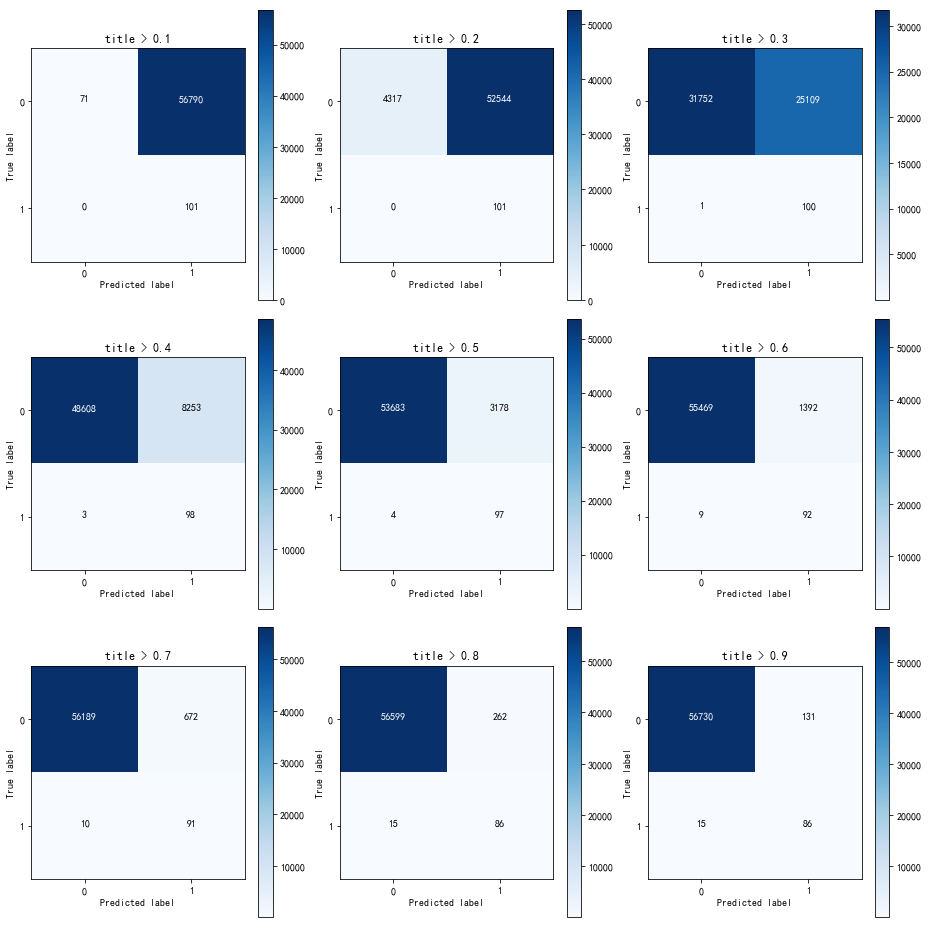

In [19]:
# 我们重新回到下采样策略，对比下不同的阈值对召回率和精度的影响

lr = LogisticRegression(C = 0.01)
lr.fit(X_train_undersample, y_train_undersample)
# 输出得到 y 的概率值
y_pred_undersample_proba = lr.predict_proba(X_test)

# 设定不同的概率门槛
thresholds = [i/10 for i in range(1,10)]

recall_lst= []
acc_lst= []

plt.subplots(figsize = (13,13))
j = 1
for i in thresholds:
    # 如果是二分类就是第 0 列对应 0，第一列对应 1
    y_thresh_pred = y_pred_undersample_proba[:,1] > i
    
    
    plt.subplot(3,3, j)
    j += 1
    
    cnf_confusion = confusion_matrix(y_test, y_thresh_pred)
    recall = cnf_confusion[1,1]/(cnf_confusion[1,0]+cnf_confusion[1,1])
    acc = (cnf_confusion[0,0]+cnf_confusion[1,1])/cnf_confusion.sum()
    recall_lst.append(recall)
    acc_lst.append(acc)
    
    print('thresholds {} 召回率为 {:.3f} 精度为 {:.3f}'.format(i, recall, acc))
    plot_confusion_matrix(cnf_confusion, title = 'title > {}'.format(i))

[1.0, 1.0, 0.99009900990099009, 0.97029702970297027, 0.96039603960396036, 0.91089108910891092, 0.90099009900990101, 0.85148514851485146, 0.85148514851485146]


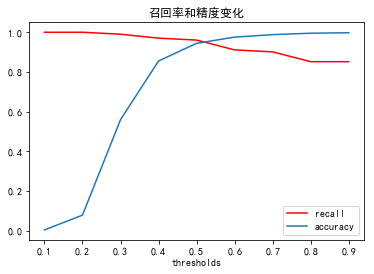

In [20]:
print(recall_lst)
plt.plot([i/10 for i in range(1,10)],recall_lst, label = 'recall', c = 'r')
plt.plot([i/10 for i in range(1,10)],acc_lst, label='accuracy')

plt.xlabel('thresholds')
plt.legend()
plt.title('召回率和精度变化')
plt.figure(figsize = (7,7))

不得不说，下采样的效果比直接用原始数据集好太多，因为我们主要还是关注召回率，但同时我们也希望精度越高越好，接下来再看看过采样策略如何 ~

### SMOTE样本生成策略

* 对于少数类中每一个样本x，以欧式距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻
* 根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本X，从其K近邻中随机选择若干个样本，假设选择的近邻为$x_n$
* 对于每一个随机选出的近邻$x_n$，分别于原样本按照如下的公式创建新的样本

$$
x_{new}=x+rand\left( \text{0,}1 \right) \times \left( \widetilde{x}-x \right) 
$$


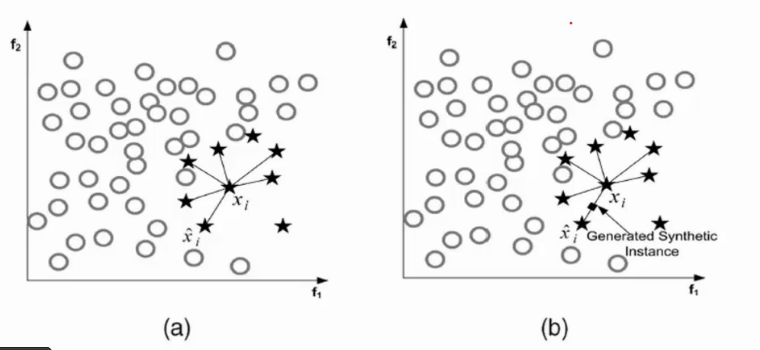

此处我不知道如何根据样本不平衡比例以确定采样倍率N，后续学习中学习到再补充，学习的小伙伴们也可以参与补充。

本案例中设置为5个近邻的均值

In [21]:
# 此处需要安装这个库 imblearn    pip install imblearn

import imblearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

origi_data = pd.read_csv('creditcard.csv')

data = origi_data.copy()

# 标准化 Amount 列
data['Amount'] = StandardScaler().fit_transform(data[['Amount']])

# 删除 Time 列
data = data.drop(['Time'], axis = 1)

# 得到 x 和 y
feature_data = data.loc[:,data.columns != 'Class']
label_data = data.loc[:, data.columns == 'Class']

# 拆分得到测试集和训练集
X_train, X_test, y_train, y_test= train_test_split(feature_data, 
                                                    label_data, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [22]:
from imblearn.over_sampling import SMOTE

# 初始化 oversample 对象
oversampler = SMOTE(random_state = 0, k_neighbors = 5) # 默认选取的 k 近邻为5个
os_X, os_y = oversampler.fit_sample(X_train, y_train)

E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# 此时我们已得到过采样样本 

len(os_y[os_y == 1])

227454

In [24]:
# 用 SMOTE 策略生成的样本去拟合模型

os_X = pd.DataFrame(os_X)
os_y = pd.DataFrame(os_y)

best_c = print_Kfold_scores(os_X, os_y)

c_param:0.01


E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1 recall 0.9161290322580645
Iteration 2 recall 0.9144736842105263
Iteration 3 recall 0.9104348788314707
Iteration 4 recall 0.8926259328870864
Iteration 5 recall 0.8932854112397094

Mean Recall 0.9053897878853714

c_param:0.1


E:\171222_Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Iteration 1 recall 0.9161290322580645
Iteration 2 recall 0.9144736842105263
Iteration 3 recall 0.9115857032200951
Iteration 4 recall 0.8943185939921522
Iteration 5 recall 0.8950660027917917

Mean Recall 0.9063146032945261

c_param:1
Iteration 1 recall 0.9161290322580645
Iteration 2 recall 0.9144736842105263
Iteration 3 recall 0.9118291468407658
Iteration 4 recall 0.8945164374979391
Iteration 5 recall 0.8952528549917016

Mean Recall 0.9064402311597994

c_param:10
Iteration 1 recall 0.9161290322580645
Iteration 2 recall 0.9144736842105263
Iteration 3 recall 0.9118734093172512
Iteration 4 recall 0.8945384201096932
Iteration 5 recall 0.8952528549917016

Mean Recall 0.9064534801774474

c_param:100
Iteration 1 recall 0.9161290322580645
Iteration 2 recall 0.9144736842105263
Iteration 3 recall 0.9118734093172512
Iteration 4 recall 0.8945384201096932
Iteration 5 recall 0.8952528549917016

Mean Recall 0.9064534801774474


**************************
本次迭代从k折交叉验证中得到最好的参数选择是当惩罚系数为 10.0 时
***********

In [25]:
# 建立模型，拟合，预测
lr = LogisticRegression(C = best_c.values[0], random_state = 0)
lr.fit(os_X, os_y)
y_os_pred = lr.predict(X_test)

E:\171222_Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


过采样策略的召回率为0.9405940594059405
精度为0.975053544468242


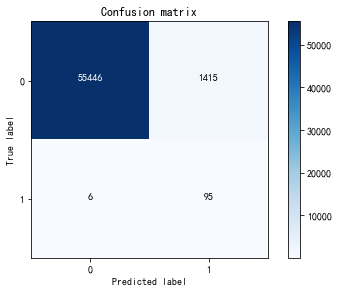

In [26]:
cnf_matrix = confusion_matrix(y_test, y_os_pred)

recall_os = (cnf_matrix[1,1])/(cnf_matrix[1,0] + cnf_matrix[1,1])
acc_os = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix.sum())
print('过采样策略的召回率为{}\n精度为{}'.format(recall_os, acc_os))

plot_confusion_matrix(cnf_matrix)

thresh 0.1, recall 0.970, acc 0.791
thresh 0.2, recall 0.970, acc 0.904
thresh 0.3, recall 0.960, acc 0.943
thresh 0.4, recall 0.950, acc 0.964
thresh 0.5, recall 0.941, acc 0.975
thresh 0.6, recall 0.931, acc 0.981
thresh 0.7, recall 0.921, acc 0.987
thresh 0.8, recall 0.901, acc 0.991
thresh 0.9, recall 0.891, acc 0.994


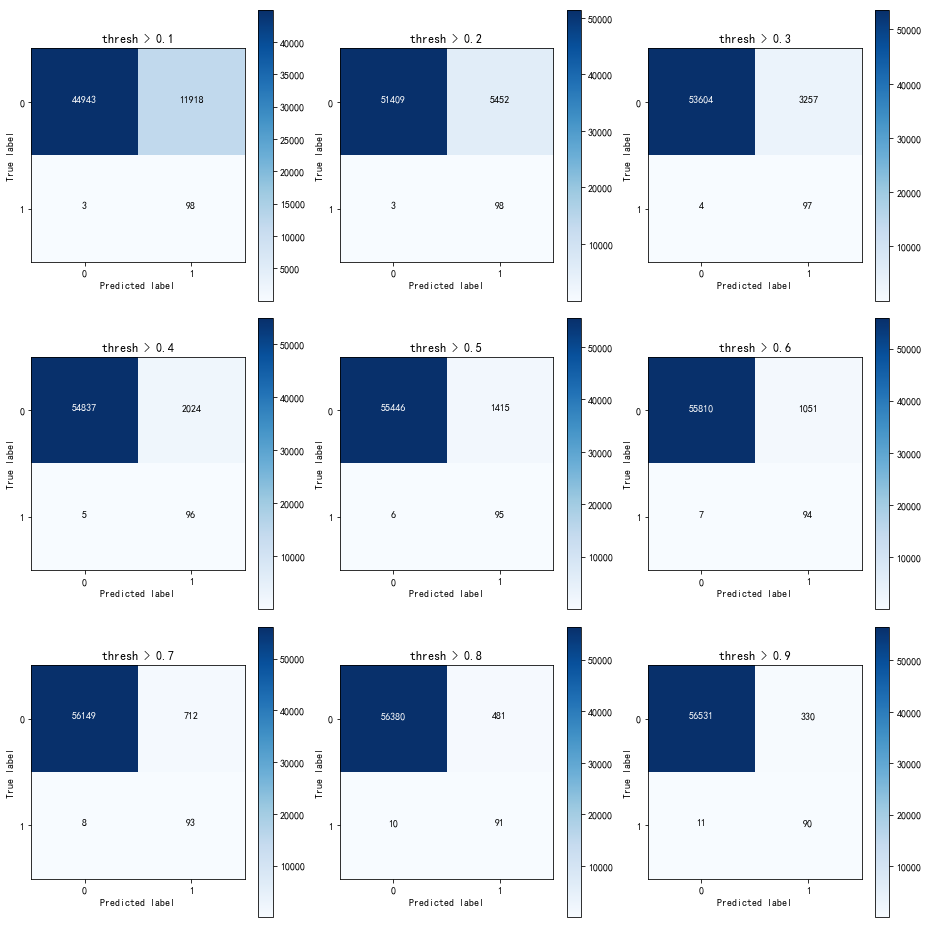

In [27]:
# 对过采样策略设定不同阈值并观察

y_test_pro = lr.predict_proba(X_test)

thresholds = [i/10 for i in range(1,10)]

j = 1

recall_lst_os = []
acc_lst_os = []

plt.figure(figsize = (13,13))

for i in thresholds:
    y_test_pred = y_test_pro[:,1] > i
    
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    acc = (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
    recall_lst_os.append(recall)
    acc_lst_os.append(acc)
    print('thresh {}, recall {:.3f}, acc {:.3f}'.format(i,recall, acc))
    
    plt.subplot(3, 3, j)
    plot_confusion_matrix(cnf_matrix, title = 'thresh > {}'.format(i))
    j+= 1
    

Text(0.5,1,'recall 和 acc 随 thresh 变化')

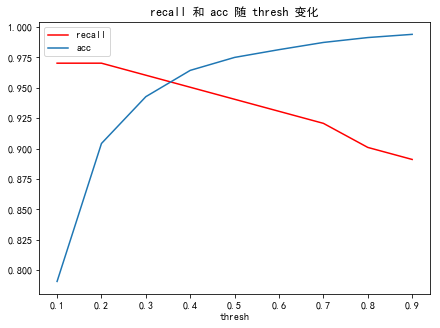

In [41]:
plt.figure(figsize = (7,5))
plt.plot([i/10 for i in range(1,10)], recall_lst_os, c = 'r', label = 'recall')
plt.plot([i/10 for i in range(1,10)], acc_lst_os, label = 'acc')

plt.legend()
plt.xlabel('thresh')
plt.title('recall 和 acc 随 thresh 变化')

Text(0.5,1,'下采样和过采样 对比')

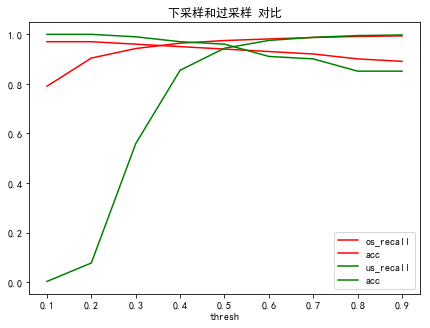

In [43]:
x = [i/10 for i in range(1,10)]

plt.figure(figsize = (7,5))
plt.plot(x, recall_lst_os, c = 'r', label = 'os_recall')
plt.plot(x, acc_lst_os, c = 'r', label = 'acc', )

plt.plot(x, recall_lst,label = 'us_recall', c = 'g')
plt.plot(x, acc_lst, label = 'acc', c = 'g')

plt.legend()
plt.xlabel('thresh')
plt.title('下采样和过采样 对比')

个人体会：
* 面对样本不均衡情况时，能选择数据生成策略尽量选择生成策略（在计算能力在接受范围内）
* 本案例中，下采样方法没有学习到所有数据，所以精度会受损, 过采样可能学习了所有数据，召回率有一些的降低。具体选择，需要依据特定的场景目标选择模型。
* 可以继续尝试线性回归中不同惩罚项，SMOTE策略不同k值等继续优化。
* 等初步学习完随机森林后，再尝试随机森林分类器。

In [ ]:
print()

In [48]:
a = 1 + 2

In [49]:
print(a)

3
